# EXCEED Prolific Study: Finding the Fantastic Four - Combined (Prolific + Convenience Sampling)

Within this notebook, we will analyze the results of our pilot study where we asked participants to go over 8 different Python buggy code snippets, and their associated standard interpreter error messages, and provide ratings on a 1-5 scale for several statements, namely:
- "_This code snippet is difficult to understand._"
- "_I would find it challenging to resolve the issue in this code snippet._"
- "_Reading this error message feels mentally demanding._"
- "_This error message is useful for identifying the problem._"

The goal of this analysis isn't to necessarily find a "best" or "worst" error message (and code snippet), but rather to identify the four Python code snippets and their associated error messages that we will later use within the actual main Prolific study. We will refer to these as the "Fantastic Four".

In this notebook we will analyze the results of the pilot study to identify the "Fantastic Four" snippets. The data within this section was collected from participants both sourced via Prolific, both also via convenience sampling.

## Step 0: Install Required Python Libraries

In [1]:
%pip install -r requirements.txt

  Using cached pandas-2.2.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (89 kB)
  Using cached ipython-9.2.0-py3-none-any.whl.metadata (4.4 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached numpy-2.2.6-cp312-cp312-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached scipy-1.15.3-cp312-cp312-macosx_14_0_arm64.whl.metadata (61 kB)
  Using cached matplotlib-3.10.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pandas_stubs-2.3.0.250703-py3-none-any.whl.metadata (10 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached MarkupSafe-3.0.2-cp312-cp312-macosx_11_0_arm64.whl.metadata (4.0 kB)
  Using cached contourpy-1.3.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.59.0-cp312-cp312-macos

## Step 1: Load the Data

In [2]:
import pandas as pd

# Set the path to the CSV file which contains the results of the pilot study
file_path = "../data/pilot_study_combined_results.csv"

# Load the data into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print("Displaying the first 5 rows of the DataFrame:")
df.head()

Displaying the first 5 rows of the DataFrame:


,Timestamp,This code snippet is difficult to understand.,I would find it challenging to resolve the issue in this code snippet.,Reading this error message feels mentally demanding.,This error message is useful for identifying the problem.,This code snippet is difficult to understand..1,I would find it challenging to resolve the issue in this code snippet..1,Reading this error message feels mentally demanding..1,This error message is useful for identifying the problem..1,This code snippet is difficult to understand..2,...,Reading this error message feels mentally demanding..5,This error message is useful for identifying the problem..5,This code snippet is difficult to understand..6,I would find it challenging to resolve the issue in this code snippet..6,Reading this error message feels mentally demanding..6,This error message is useful for identifying the problem..6,This code snippet is difficult to understand..7,I would find it challenging to resolve the issue in this code snippet..7,Reading this error message feels mentally demanding..7,This error message is useful for identifying the problem..7
0,2025/07/31 11:59:34 am EEST,1,1,3,3,3,1,1,2,1,...,2,2,2,3,3,1,2,3,3,2
1,2025/07/31 3:16:40 pm EEST,4,4,4,2,2,1,1,5,1,...,2,2,1,1,1,5,4,4,4,2
2,2025/08/01 11:27:09 am EEST,3,1,1,1,3,1,1,5,1,...,1,5,1,1,1,5,1,1,1,5
3,2025/08/01 6:34:41 pm EEST,2,1,3,4,1,1,1,5,1,...,1,5,1,1,1,5,1,2,1,5
4,2025/08/01 6:50:32 pm EEST,1,2,2,2,1,1,1,5,2,...,2,4,1,1,1,5,3,4,4,2


## Step 2: Keep Only Rows with Attention Check Passed

In [3]:
# Define the column indices for each snippet
snippet_columns = {
    'snippet_1': list(range(1, 5)),
    'snippet_2': list(range(5, 9)),
    'snippet_3': list(range(9, 13)),
    'snippet_4': list(range(13, 18)),  # includes attention check
    'snippet_5': list(range(18, 22)),
    'snippet_6': list(range(22, 26)),
    'snippet_7': list(range(26, 30)),
    'snippet_8': list(range(30, 34)),
}

# Remove rows where the attention check failed (attention check column should be at index 16)
attention_check_col = df.columns[16]  # Get the actual column name at index 16

# Number of participants in the study before filtering
num_participants_before = len(df)
print(f"Number of participants before filtering for attention check: {num_participants_before}")

# Filter rows only where attention check is passed (5 means strongly agree)
filtered_df = df[df[attention_check_col] == 5]

# Number of participants in the study after filtering for attention check
num_participants_after = len(filtered_df)
print(f"Number of participants after filtering for attention check: {num_participants_after}")

# Adjust snippet_columns for snippet_4 to exclude the attention check column
snippet_columns_adjusted = snippet_columns.copy()
snippet_columns_adjusted['snippet_4'] = [13, 14, 15, 17]  # Exclude the attention check column (index 16)

# Extract questions and results for each snippet
snippets = {}
for key, cols in snippet_columns_adjusted.items():
    col_names = filtered_df.columns[cols]
    snippets[key] = filtered_df[col_names]


Number of participants before filtering for attention check: 21
Number of participants after filtering for attention check: 20


### Step 3: Analyze the Data

In this step we will perform the following analyses:
1. Calculate the average ratings for each snippet for each question.
2. Rank the snippets based on their average ratings for each question.
3. Plot the average ratings for each snippet for each question.

### Step 3.1: Calculate Average Ratings for Each Snippet For Each Question

In this step, we will calculate the average ratings for each question across all snippets. This will help us understand how participants rated each snippet in terms of difficulty, challenge, mental demand, and usefulness of the error message. We will plot a bar chart for each question showing the average ratings for all snippets.

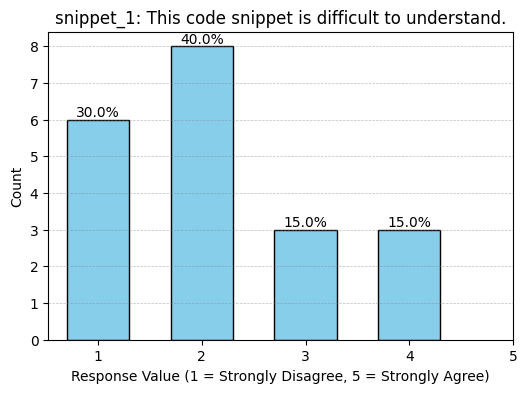

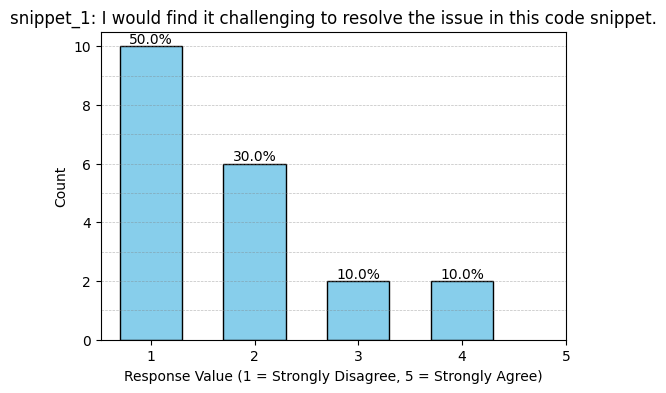

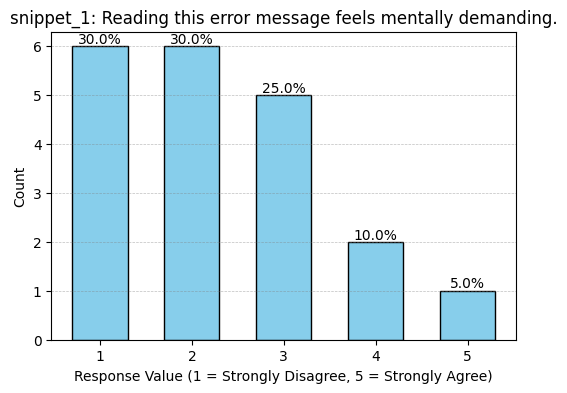

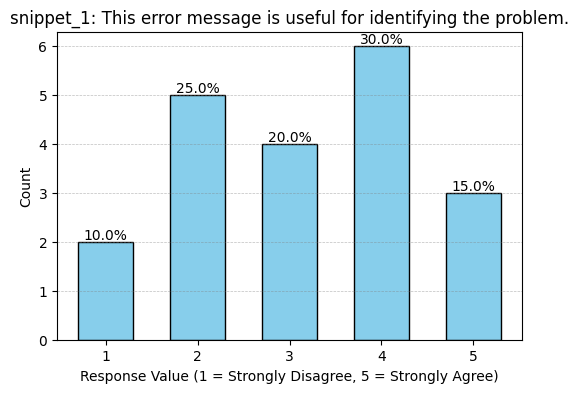

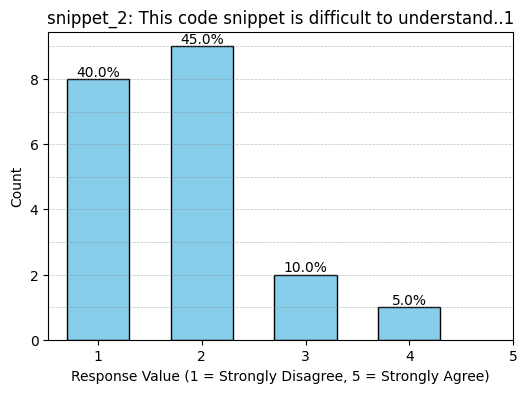

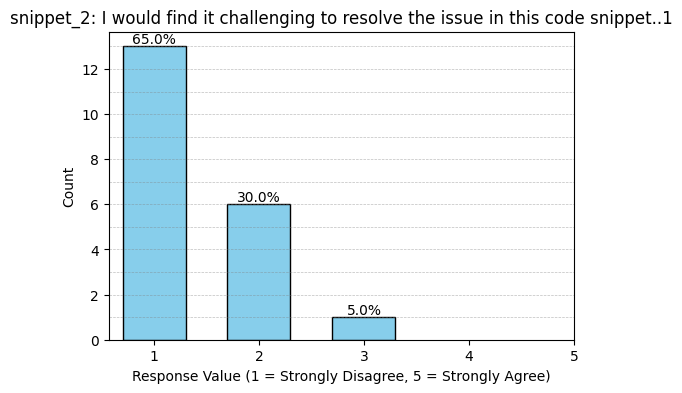

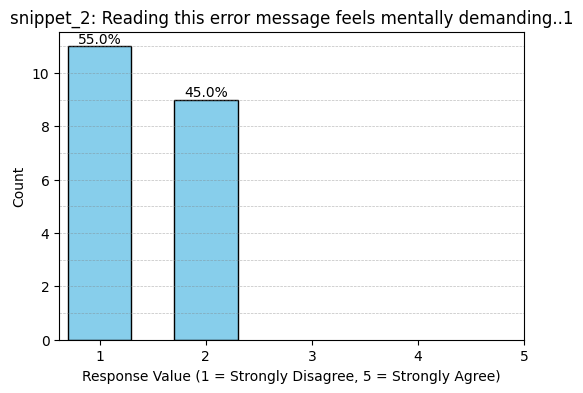

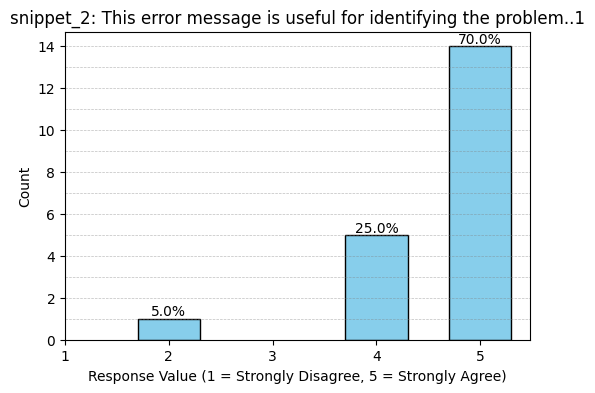

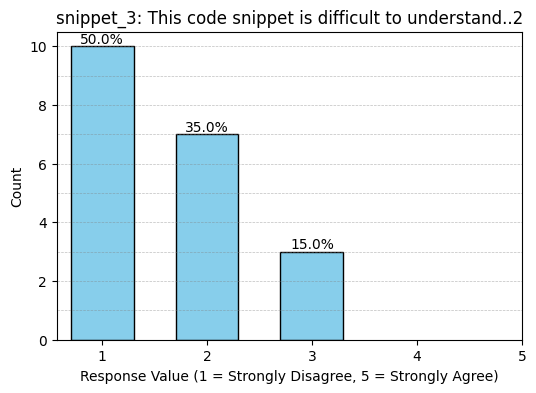

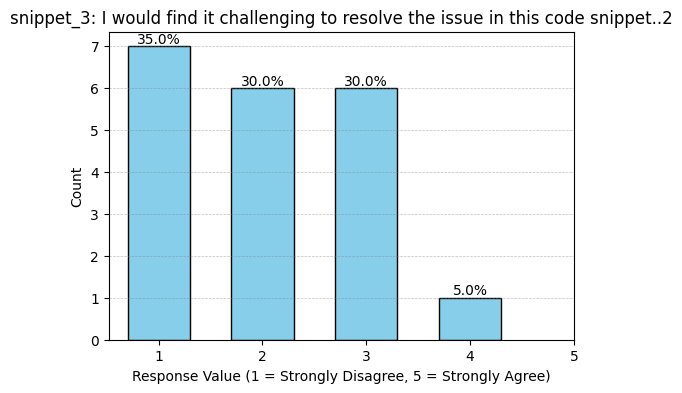

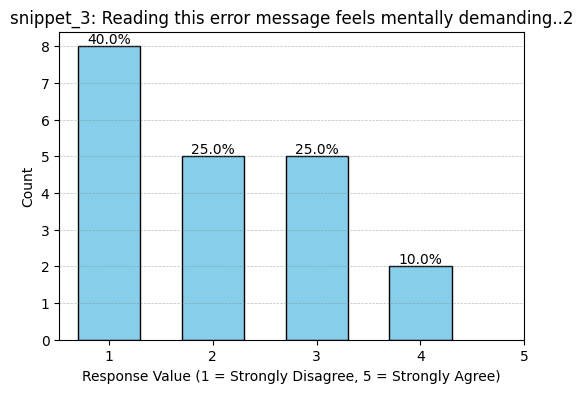

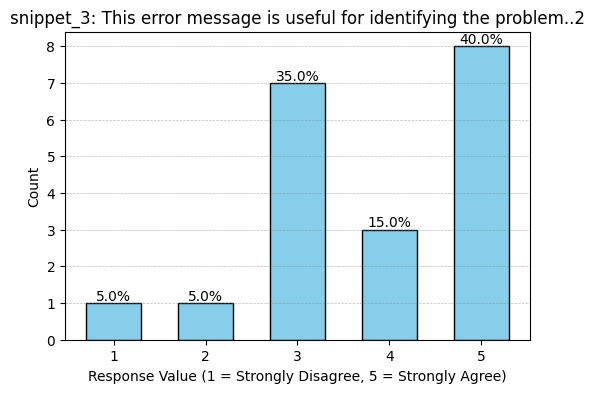

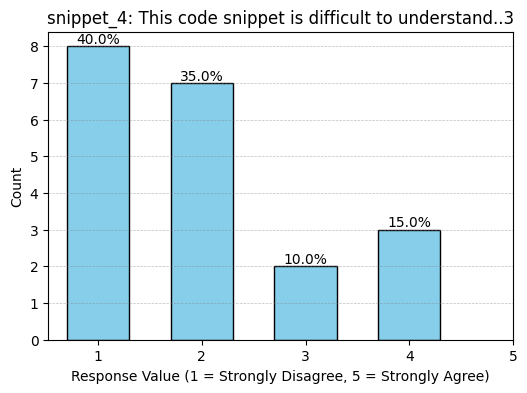

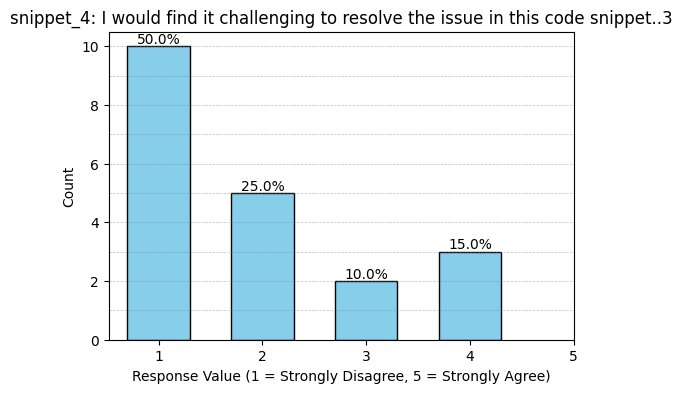

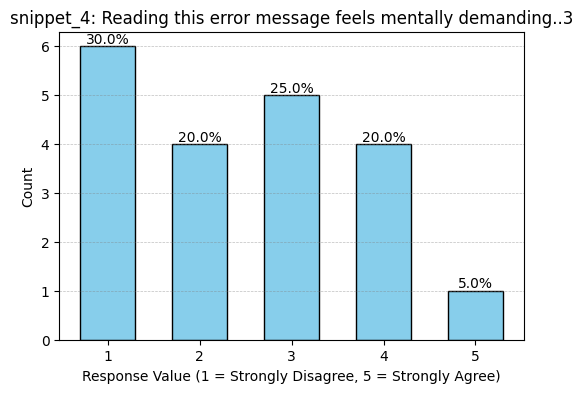

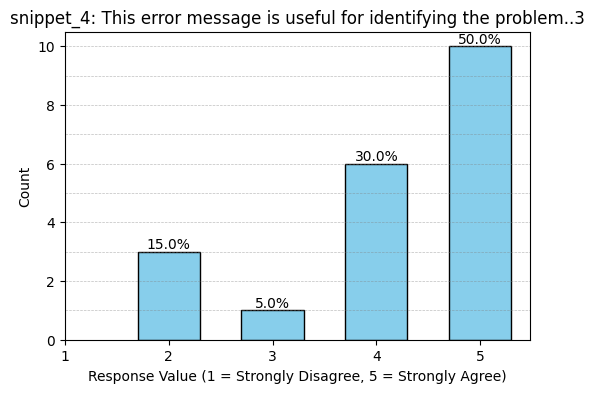

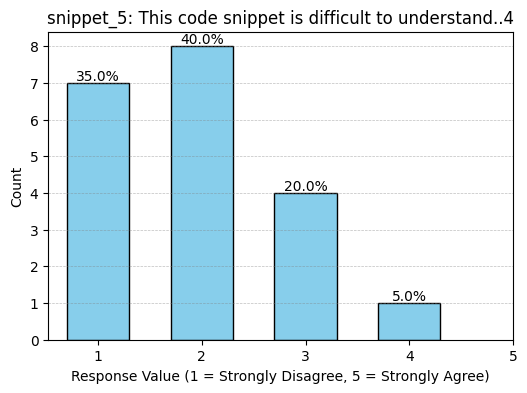

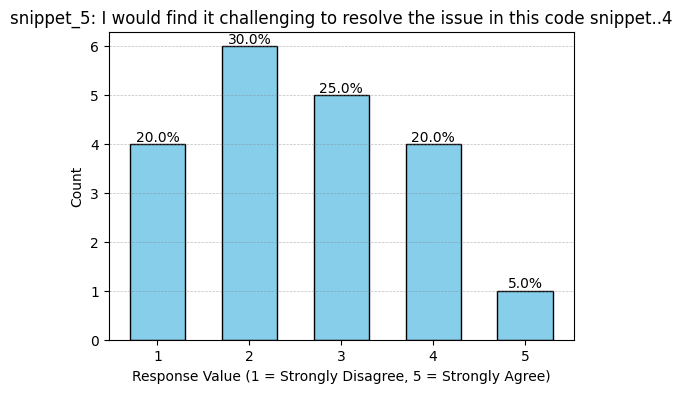

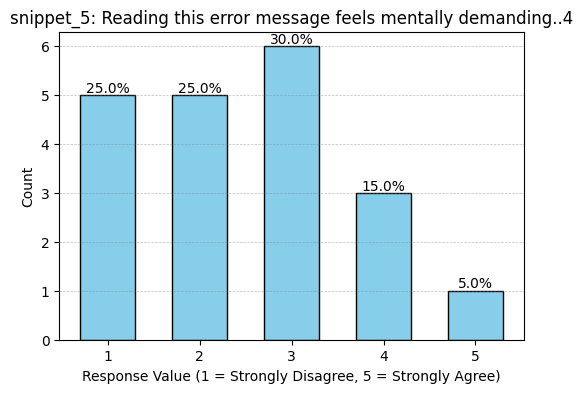

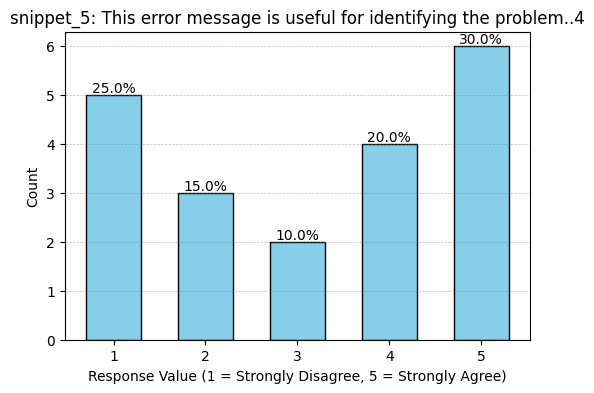

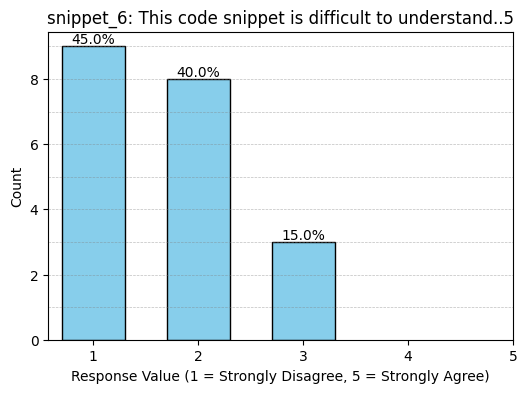

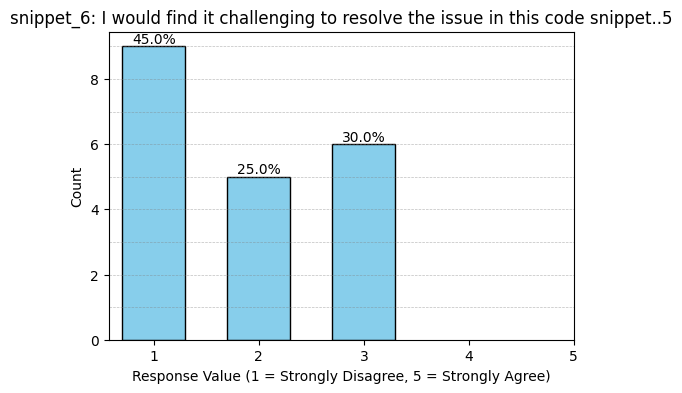

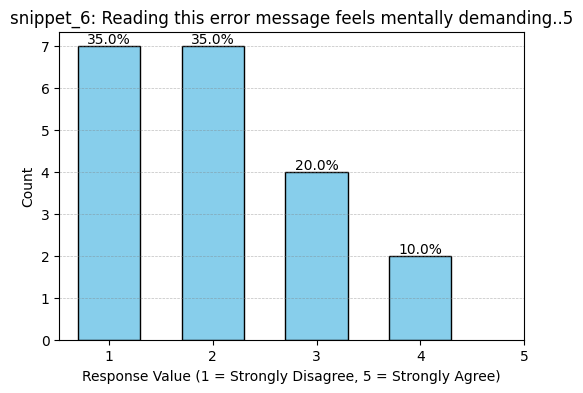

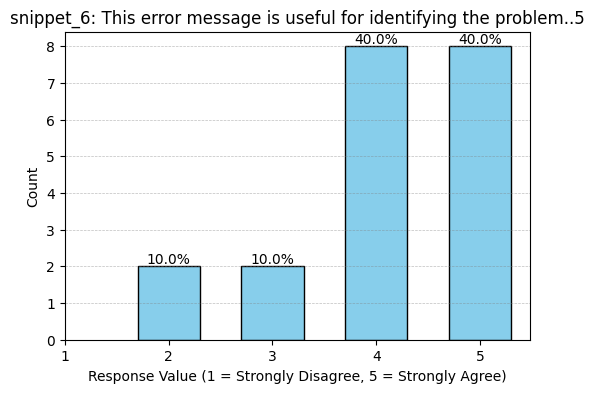

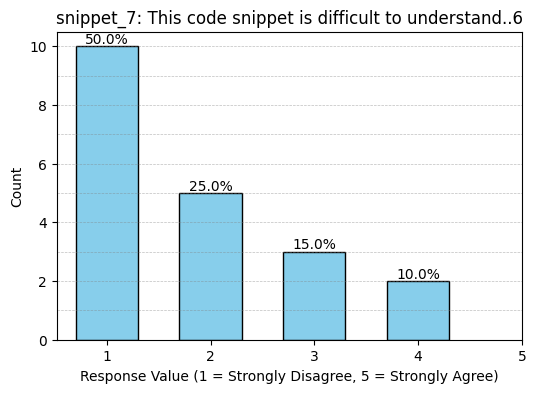

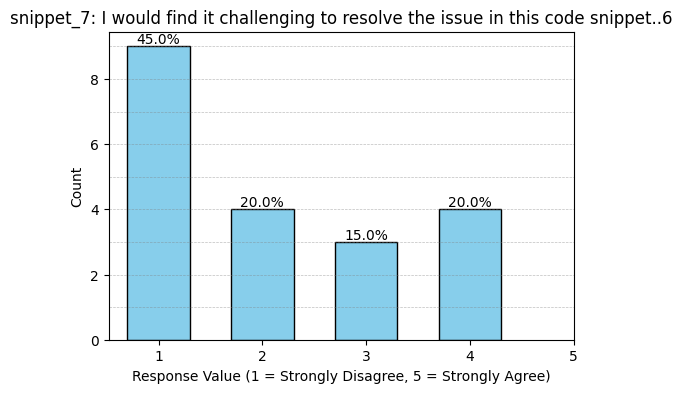

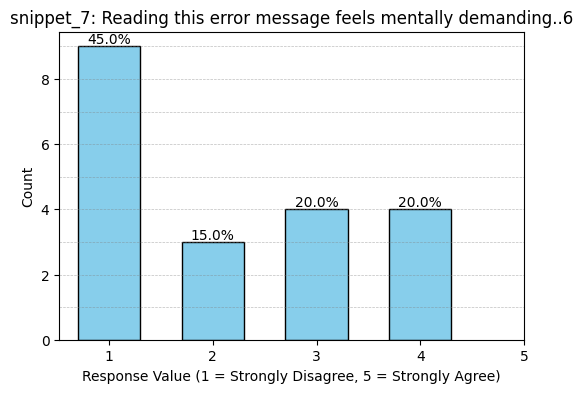

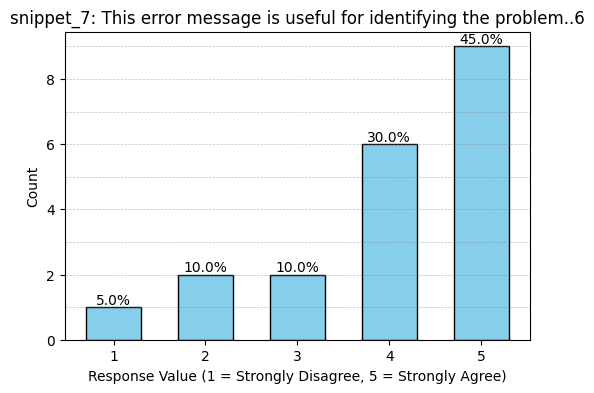

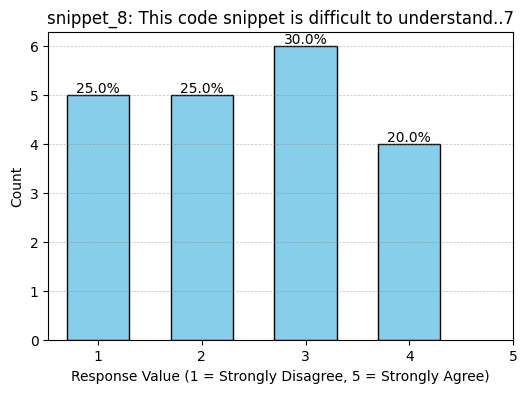

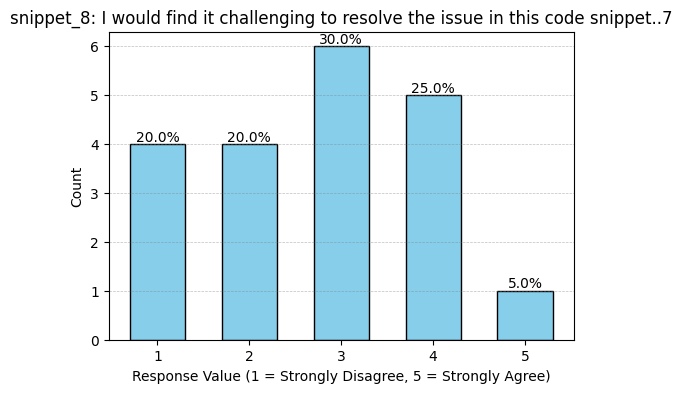

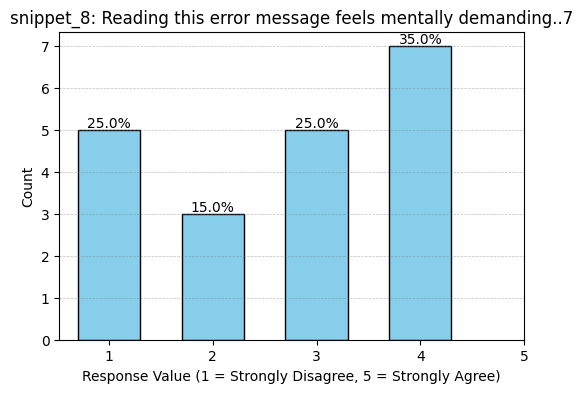

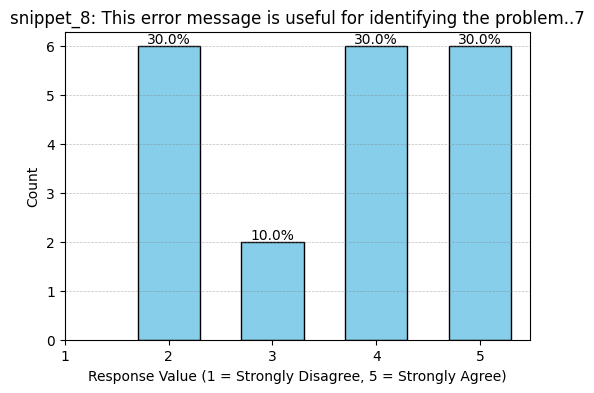

In [4]:
import matplotlib.pyplot as plt

# Plot histograms for each snippet and each question, with percentages on each bar
for snippet_name, snippet_df in snippets.items():
    for col in snippet_df.columns:
        plt.figure(figsize=(6, 4))
        data = snippet_df[col].dropna().astype(int)
        counts = data.value_counts().sort_index()
        total = counts.sum()
        bars = plt.bar(counts.index, counts.values, color='skyblue', edgecolor='black', align='center', width=0.6)
        plt.title(f"{snippet_name}: {col}")
        plt.xlabel("Response Value (1 = Strongly Disagree, 5 = Strongly Agree)")
        plt.ylabel("Count")
        plt.xticks(range(1, 6))

        # Annotate each bar with percentage
        for bar in bars:
            height = bar.get_height()
            percent = f"{height / total * 100:.1f}%"
            plt.text(bar.get_x() + bar.get_width() / 2, height, percent, ha='center', va='bottom', fontsize=10)

        # Add horizontal lines for each integer value on the y-axis
        y_min, y_max = plt.gca().get_ylim()
        for y in range(int(y_min), int(y_max) + 1):
            plt.axhline(y, color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

        plt.show()


### Step 3.2: Rank Snippets Based on Average Ratings

In this step, we will calculate the average ratings for each snippet across all questions. We will then rank the snippets based on these average ratings to identify the "Fantastic Four" snippets that we will use in the main Prolific study.

In [5]:
# Step 3.2: Calculate mean rating for each question for each code+error snippet, displaying each question only once
question_names = snippets['snippet_1'].columns[:4]
mean_ratings = {q: [] for q in question_names}
snippet_labels = []
for snippet_name, snippet_df in snippets.items():
    snippet_labels.append(snippet_name)
    for i, q in enumerate(question_names):
        mean_ratings[q].append(pd.to_numeric(snippet_df.iloc[:, i], errors='coerce').dropna().mean())
mean_ratings_df = pd.DataFrame(mean_ratings, index=snippet_labels)
mean_ratings_df.index.name = 'Snippet'
mean_ratings_df.columns.name = 'Question'

print("Mean Ratings for Each Question (columns) and Each Snippet (rows):")
print(mean_ratings_df)

Mean Ratings for Each Question (columns) and Each Snippet (rows):
Question   This code snippet is difficult to understand.  \
Snippet                                                    
snippet_1                                           2.15   
snippet_2                                           1.80   
snippet_3                                           1.65   
snippet_4                                           2.00   
snippet_5                                           1.95   
snippet_6                                           1.70   
snippet_7                                           1.85   
snippet_8                                           2.45   

Question   I would find it challenging to resolve the issue in this code snippet.  \
Snippet                                                                             
snippet_1                                               1.80                        
snippet_2                                               1.40                  

### Step 3.3: Rank Snippets Based on Mean Ratings

In [6]:
# Step 3.3: For each question, print the snippets ordered ascendingly by their mean rating
for question in mean_ratings_df.columns:
    print(f"\nRanking for question: {question}")
    ranked_snippets = mean_ratings_df[question].sort_values(ascending=True)
    print(ranked_snippets)


Ranking for question: This code snippet is difficult to understand.
Snippet
snippet_3    1.65
snippet_6    1.70
snippet_2    1.80
snippet_7    1.85
snippet_5    1.95
snippet_4    2.00
snippet_1    2.15
snippet_8    2.45
Name: This code snippet is difficult to understand., dtype: float64

Ranking for question: I would find it challenging to resolve the issue in this code snippet.
Snippet
snippet_2    1.40
snippet_1    1.80
snippet_6    1.85
snippet_4    1.90
snippet_3    2.05
snippet_7    2.10
snippet_5    2.60
snippet_8    2.75
Name: I would find it challenging to resolve the issue in this code snippet., dtype: float64

Ranking for question: Reading this error message feels mentally demanding.
Snippet
snippet_2    1.45
snippet_3    2.05
snippet_6    2.05
snippet_7    2.15
snippet_1    2.30
snippet_4    2.50
snippet_5    2.50
snippet_8    2.70
Name: Reading this error message feels mentally demanding., dtype: float64

Ranking for question: This error message is useful for identifying t

### Step 3.4: Plot the Mean Ratings for Each Snippet

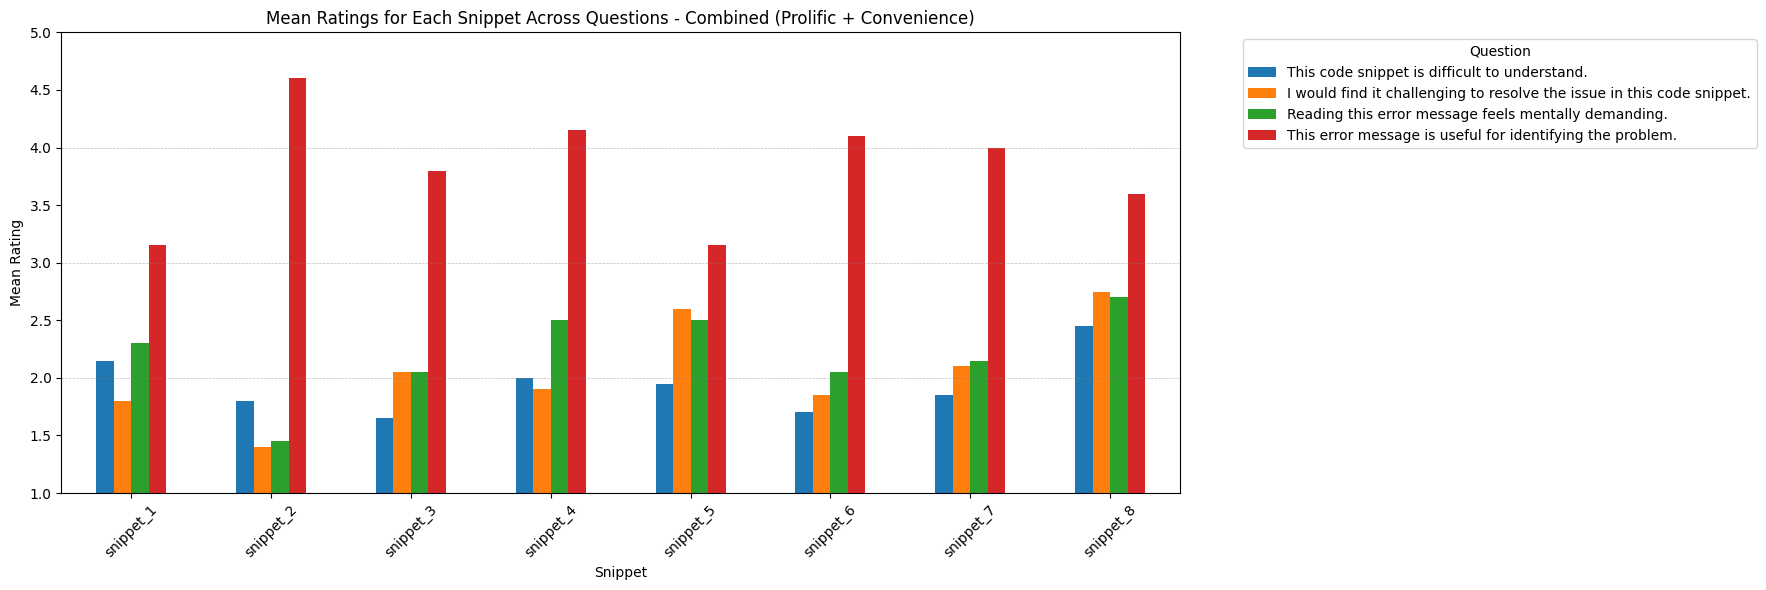

In [7]:
import matplotlib.pyplot as plt

# Plot the mean ratings for each snippet
mean_ratings_df.plot(kind='bar', figsize=(12, 6))
plt.title("Mean Ratings for Each Snippet Across Questions - Combined (Prolific + Convenience)")
plt.xlabel("Snippet")
plt.ylabel("Mean Rating")
plt.ylim(1, 5)
plt.xticks(rotation=45)
plt.tight_layout()

# Place the legend outside the plot
plt.legend(title="Question", bbox_to_anchor=(1.05, 1), loc='upper left')

# Add horizontal lines for each integer value on the y-axis
min_y = int(mean_ratings_df.min().min())
max_y = int(mean_ratings_df.max().max())
for y in range(min_y, max_y + 1):
    plt.axhline(y, color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

plt.show()

## Step 4: Finding The Fantastic Four

In this section we will choose the final 4 code snippets to be used within the main Prolific study.

### Step 4.1: Correlation Matrix

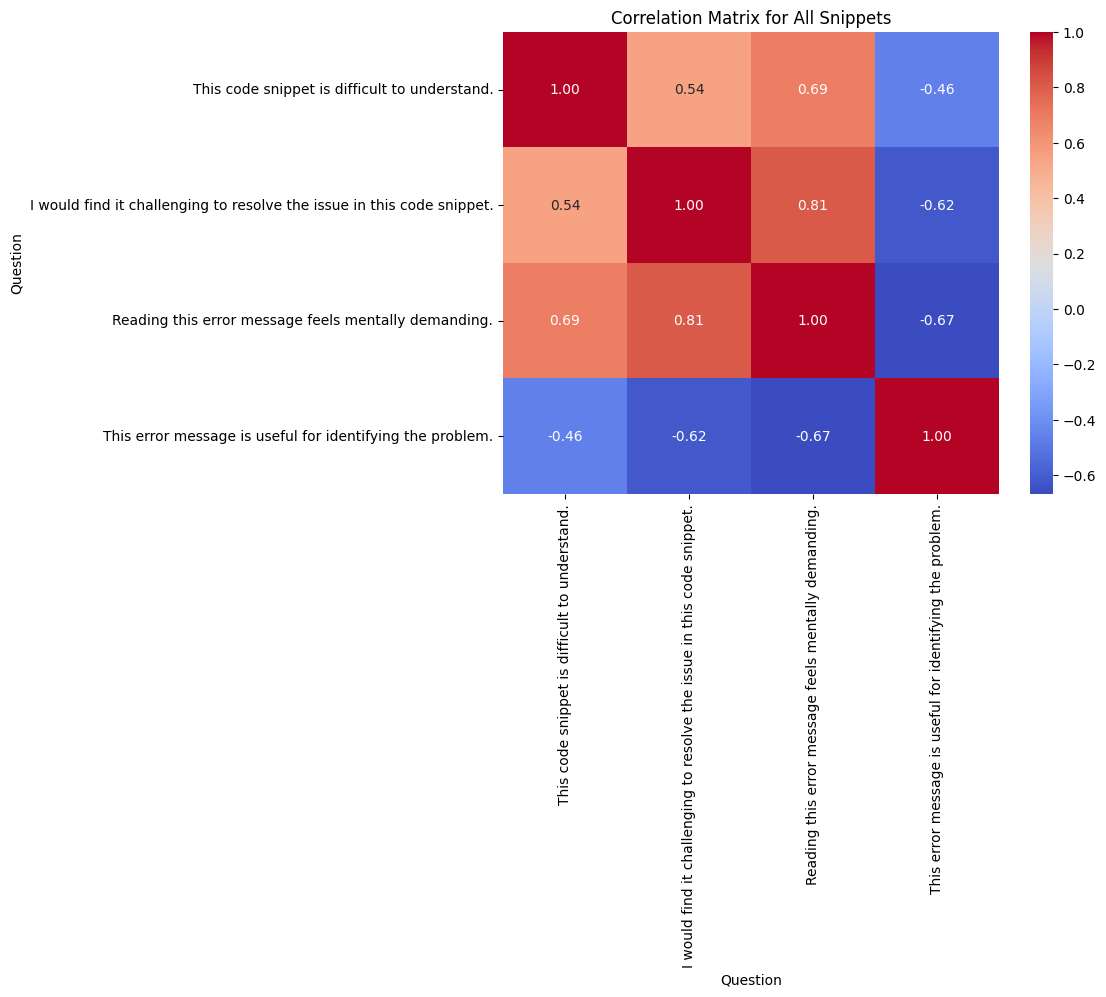

In [12]:
import seaborn as sns

# Calculate the correlation matrix for all snippets
correlation_matrix_all = mean_ratings_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_all, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Matrix for All Snippets")
plt.show()

### Step 4.2: Final Selection of Snippets

Looking at the correlation matrix of the mean ratings for each question of the snippets, we see the following correlations:
- Mentally demanding error message + Challenging to resolve issue in code snippet: `0.81` = strong positive correlation
- Code snippet is difficult to understand + Mentally demanding error message: `0.69` = moderate positive correlation
- Reading this error message feels mentally demanding + Error message is useful for identifying the problem: `-0.67` = moderate negative correlation
- Challenging to resolve issue in code snippet + Error message is useful for identifying the problem: `-0.61` = moderate negative correlation


The top 2 snippets that have error messages least useful for identifying the problem are, and also difficult to understand, are:
- Snippet 1 (`SyntaxError: unterminated triple-quoted string`)
- Snippet 8 (`TypeError: builtin_function_or_method object is not subscriptable`)

These are definitely part of the "Fantastic Four". We now need to select the other 2 snippets.

The next 2 snippets that have error messages the least useful for identifying the problem, and also challenging to resolve, are:
- Snippet 3 (`SyntaxError: Generator expression must be parenthesized`)
- Snippet 5 (`TypeError: unsupported operand type(s) for @: 'type' and 'type'`)

Snippet 5 was also generally found to be difficult to resolve, while also having an error that is not useful for identifying the problem. For this reason, we will also include Snippet 5 in the "Fantastic Four". 

Choosing the final snippet was a bit more difficult, as there is no clear "winner". For choosing the final 4th snippet, we looked into:
- Snippet 3 (`SyntaxError: Generator expression must be parenthesized`)
- Snippet 4 (`NameError: name 'maximum' is not defined`)
- Snippet 6 (`TypeError: unsupported operand type(s) for +=: 'int' and 'str'`)
- Snippet 7 (`SyntaxError: positional argument follows keyword argument`)

Because there not that much difference in the ratings of these snippets, we will choose Snippet 4, as it has a different error type than the other snippets. Additionally, according to previous literature, NameErrors are also commonly encountered for (novice) programmers, and thus it makes sense to include this snippet as well.

**Conclusion**:

The final "**Fantastic Four**" snippets that we will use in the main Prolific study are:
- Snippet 1: `SyntaxError: unterminated triple-quoted string`
- Snippet 4: `NameError: name 'maximum' is not defined`
- Snippet 5: `TypeError: unsupported operand type(s) for @: 'type' and 'type'`
- Snippet 8: `TypeError: builtin_function_or_method object is not subscriptable`